In [8]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)

Plot styling


In [9]:
style = 'seaborn-v0_8'
plt.style.use(style)
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

Data Import


In [10]:
filename = '../../Data/tr_eikon_eod_data.csv'
data = pd.read_csv(
    filename,
    index_col=0,
    parse_dates=True
    )

data.head(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.8
2010-01-05,30.625684,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7


Plot Apple Rolling Statistics

In [11]:
ticker = 'AAPL.O'
appl_df = pd.DataFrame(data[ticker]).dropna()
appl_df.tail(2)


,AAPL.O
Date,
2017-10-30,166.72
2017-10-31,169.04


In [12]:
window = 20

appl_df['min'] = appl_df[ticker].rolling(window=window).min()
appl_df['mean'] = appl_df[ticker].rolling(window=window).mean()
appl_df['std'] = appl_df[ticker].rolling(window=window).std()
appl_df['median'] = appl_df[ticker].rolling(window=window).median()
appl_df['max'] = appl_df[ticker].rolling(window=window).max()
appl_df['ewma'] = appl_df[ticker].ewm(halflife=0.5,min_periods=window).mean()
appl_df.tail(2)

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2017-10-30,166.72,153.48,157.4565,3.125995,156.33,166.72,165.436224
2017-10-31,169.04,153.48,158.1845,3.976135,156.48,169.04,168.139056


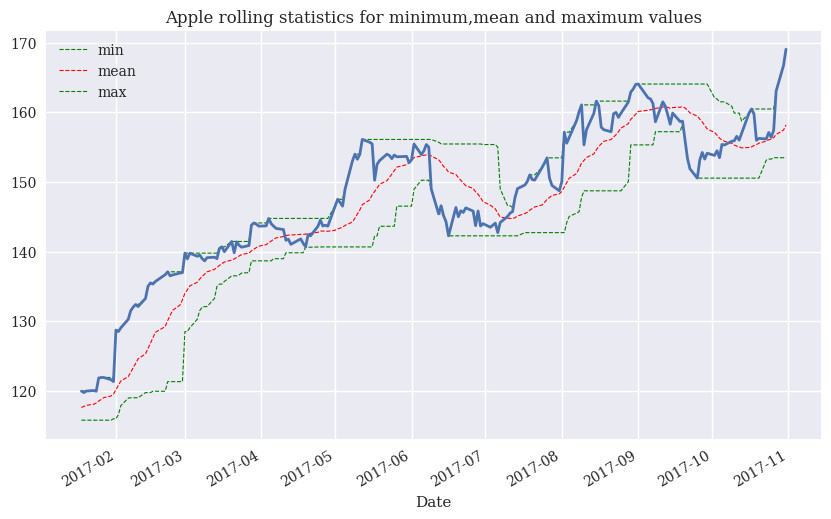

In [13]:
ax = appl_df[['min','mean','max']].iloc[-200:].plot(
    figsize=(10,6),
    style=['g--','r--','g--'],
    lw=0.8
    )

appl_df[ticker].iloc[-200:].plot(ax=ax,lw=2)


plt.title('Apple rolling statistics for minimum,mean and maximum values')
plt.show()